In [118]:
import pandas as pd
from collections import Counter
from sklearn import preprocessing
import numpy as np

### 1. Gather Data

In [2]:
train_data = pd.read_csv(r'TrainData_PA.csv')
train_data_before_clean = train_data.copy()

### 2. Assess Data : Inspecting Data for Quality and Tidiness Issues
#### 2.1 Quality Issues : Issues with content - missing, duplicate or incorrect data. a.k.a Dirty data 
* 2.1.a Completeness : *"Are there any rows, columns or cells missing ?"*
  * Zipcode, county, address & property_type has the missing values
####   
* 2.1.b Validity : *"Does the data comply to the data schema like duplicate patient id or zip code being < 5 digits or float data type?"*
  * zipcode is float type
  * longitude and lattitude has to be represented in 3 dimentional space (x,y,z). So that digits can be used as the numerical value.
####   
  
* 2.1.c Accuracy : *"Wrong data that is valid. like hieght = 300 inches; it still complies to the standard i.e. inches but data is in accurate."*
  * Census_MedianIncome = 0 may be an outlier
####   
  
* 2.1.d Consistency : *"Both valid and accurate but inconsistent. state = california and CA"*
  * lotsize does not clearly indicate its metric of calculation.
####    


#### 2.2 Tidiness Issues: Issues with structure - untidy or messy data
* 2.2.a Each observation is a row
  * There are 50+ redundant data samples.
######   
* 2.2.b Each variable is a column
  * State is an obsolete column as it has only one value
  * property_type is categorical
  * garage, pool, fireplace, patio are binary
  * time is ordinal (2016.25, 2015.75, 2015.5, 2015.25)
######  
* 2.2.c Each observational unit is a table
  * 'time' variable has introduced redundancy in the dataset
######   

In [3]:
train_data

,county,city,zipcode,address,state,rent,latitude,longitude,cemetery_dist_miles,nationalhighway_miles,...,lotsize,Census_MedianIncome,CollegeGrads,WhiteCollar,Schools,Unemployment,EmploymentDiversity,Census_Vacancy,Crime_Rate,HomePrice
0,NaN,WEXFORD,NaN,266 Clematis Dr Allegheny County,PA,2400,40.618200,-80.077600,1.019586,0.206222,...,4086.388045,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
1,NaN,WHITEHALL,NaN,2310 N 1st Ave Lehigh County,PA,995,40.649906,-75.478940,1.019586,0.206222,...,2247.513425,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
2,NaN,WHITEHALL,NaN,3338 St Stephens Ln Lehigh County,PA,1740,40.646282,-75.510056,1.019586,0.206222,...,3109.741302,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
3,NaN,WAYNESBORO,NaN,97 W Main St Franklin County,PA,675,39.756992,-77.579704,1.019586,0.206222,...,2349.673126,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
4,NaN,QUAKERTOWN,NaN,200 E Broad St Bucks County,PA,1300,40.441177,-75.332540,1.019586,0.206222,...,2043.194023,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
5,NaN,WAYNESBORO,NaN,407 Viewpoint Way Franklin County,PA,1025,39.766594,-77.582490,1.019586,0.206222,...,2635.720289,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
6,NaN,WAYNESBORO,NaN,403 Viewpoint Way Franklin County,PA,1025,39.766580,-77.582450,1.019586,0.206222,...,2635.720289,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
7,NaN,WAYNESBORO,NaN,240 Crown Ct Franklin County,PA,1025,39.759663,-77.575090,1.019586,0.206222,...,2635.720289,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
8,NaN,WAYNESBORO,NaN,101 S Potomac St Franklin County,PA,795,39.755530,-77.581154,1.019586,0.206222,...,2451.832827,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051
9,NaN,UPPER DARBY,NaN,446 Woodcliffe Rd Delaware County,PA,925,39.958010,-75.264300,1.019586,0.206222,...,2051.366799,54476.09,21.0,66.57,48.3,5.10,3.48,3.42,2.400000,158051


In [5]:
for c in train_data.columns:
    print(train_data[c].describe())
    #input("Hit Enter : ")

count            18177
unique              61
top       PHILADELPHIA
freq              4970
Name: county, dtype: object
Hit Enter : 
count            18203
unique             674
top       PHILADELPHIA
freq              4970
Name: city, dtype: object
Hit Enter : 
count    18177.000000
mean     18030.505364
std       1482.025500
min      15001.000000
25%      17111.000000
50%      18944.000000
75%      19129.000000
max      19611.000000
Name: zipcode, dtype: float64
Hit Enter : 
count                                    17496
unique                                   14579
top       Center City East Philadelphia County
freq                                        51
Name: address, dtype: object
Hit Enter : 
count     18203
unique        1
top          PA
freq      18203
Name: state, dtype: object
Hit Enter : 
count    18203.000000
mean      1601.734165
std        914.730775
min        385.000000
25%       1000.000000
50%       1400.000000
75%       1900.000000
max      16000.000000
Name: r

Hit Enter : 
count    1.820300e+04
mean     1.836020e+05
std      1.877200e+05
min      2.452200e+04
25%      1.537940e+05
50%      1.580510e+05
75%      1.613435e+05
max      8.628600e+06
Name: HomePrice, dtype: float64
Hit Enter : 


In [12]:
train_data_explore = train_data.describe(include='all')
print("Number of columns : ", train_data_explore.iloc[0].shape[0])
temp_df = pd.DataFrame(train_data_explore.iloc[0],columns=['count'])
print("features with NA Attributes : ", train_data.columns[train_data.isna().any()].tolist())
temp_df.sort_values('count').head(10)

Number of columns :  40
features with NA Attributes :  ['county', 'zipcode', 'address', 'property_type']


,count
property_type,15515
address,17496
county,18177
zipcode,18177
sqft,18203
garage,18203
yearbuilt,18203
pool,18203
fireplace,18203
patio,18203


In [7]:
train_data[train_data.columns[0:10]].describe(include='all')

,county,city,zipcode,address,state,rent,latitude,longitude,cemetery_dist_miles,nationalhighway_miles
count,18177,18203,18177.000000,17496,18203,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000
unique,61,674,NaN,14579,1,NaN,NaN,NaN,NaN,NaN
top,PHILADELPHIA,PHILADELPHIA,NaN,Center City East Philadelphia County,PA,NaN,NaN,NaN,NaN,NaN
freq,4970,4970,NaN,51,18203,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,18030.505364,NaN,NaN,1601.734165,40.087378,-77.267575,1.210770,0.292568
std,NaN,NaN,1482.025500,NaN,NaN,914.730775,1.578798,5.905950,0.936564,0.363775
min,NaN,NaN,15001.000000,NaN,NaN,385.000000,-11.968575,-149.900278,0.023038,0.000035
25%,NaN,NaN,17111.000000,NaN,NaN,1000.000000,39.967467,-77.012524,0.821590,0.145526
50%,NaN,NaN,18944.000000,NaN,NaN,1400.000000,40.130577,-75.477834,1.019586,0.206222
75%,NaN,NaN,19129.000000,NaN,NaN,1900.000000,40.444644,-75.185723,1.229043,0.283572


In [8]:
train_data[train_data.columns[10:20]].describe(include='all')

,railline_miles,starbucks_miles,walmart_miles,hospital_miles,physician_dist_miles,dentist_dist_miles,opt_dist_miles,vet_dist_miles,farmers_miles,time
count,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000
mean,1.041623,2.043848,3.522699,2.270811,0.351478,0.708954,0.891707,12.368730,1.762844,2015.577913
std,1.529849,3.122275,1.758302,2.439700,0.538380,0.965186,1.065061,17.399292,2.154279,0.344428
min,0.000794,0.013197,0.118545,0.041096,0.000087,0.000157,0.000157,0.013511,0.014231,2015.250000
25%,0.470385,0.986498,2.719653,1.180311,0.170815,0.361726,0.495559,4.851441,0.751314,2015.250000
50%,0.629888,1.348776,3.326397,1.584675,0.229126,0.472933,0.651244,7.323725,1.094678,2015.500000
75%,0.862587,1.809722,3.864574,2.223802,0.300576,0.612327,0.858610,10.268145,1.709571,2015.750000
max,28.306430,61.349250,22.611844,32.433629,10.825859,19.823016,22.761643,141.184122,35.603985,2016.250000


In [9]:
train_data[train_data.columns[20:30]].describe(include='all')

,bed,bath,halfbath,sqft,property_type,garage,yearbuilt,pool,fireplace,patio
count,18203.000000,18203.000000,18203.000000,18203.000000,15515,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000
unique,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Condo,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,7418,NaN,NaN,NaN,NaN,NaN
mean,2.766247,1.623743,1.027358,1536.611218,NaN,0.292424,1959.078284,0.011262,0.207603,0.197055
std,1.440967,0.855703,0.212040,826.928419,NaN,0.454889,23.153752,0.105526,0.405602,0.397785
min,1.000000,1.000000,1.000000,35.000000,NaN,0.000000,1800.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1000.000000,NaN,0.000000,1960.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,1342.000000,NaN,0.000000,1960.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,1.000000,1846.500000,NaN,1.000000,1960.000000,0.000000,0.000000,0.000000


In [13]:
train_data[train_data.columns[30:]].describe(include='all')

,lotsize,Census_MedianIncome,CollegeGrads,WhiteCollar,Schools,Unemployment,EmploymentDiversity,Census_Vacancy,Crime_Rate,HomePrice
count,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,18203.000000,1.820300e+04
mean,3683.627327,57076.140365,24.763198,67.419613,46.932605,5.182363,3.438426,4.887957,6.385568,1.836020e+05
std,3199.469032,23873.065621,15.978667,14.839700,26.840908,0.956217,0.150475,4.431504,7.310517,1.877200e+05
min,1.000000,0.000000,1.000000,15.090000,1.000000,2.970000,2.350000,0.000000,0.000000,2.452200e+04
25%,1724.000000,41040.665000,13.000000,56.200000,22.500000,4.500000,3.370000,1.320000,1.468825,1.537940e+05
50%,2872.730796,54476.090000,21.000000,66.570000,48.100000,5.100000,3.480000,3.420000,2.400000,1.580510e+05
75%,4290.707448,70379.790000,35.000000,79.340000,68.000000,6.000000,3.540000,7.040000,9.136104,1.613435e+05
max,19341.000000,198425.570000,72.000000,95.520000,99.000000,10.000000,3.670000,31.000000,39.159639,8.628600e+06


##### Let us focus on below from the visual observation on the column descriptions.
* Sqft = 35 
* CollegeGrads = 1 
* Schools = 1
* Census_Vacancy = 0
* Crime_Rate = 0

In [63]:
print("How many properties have sqft < 1000 :",train_data_before_clean[train_data_before_clean.sqft < 1000].shape)
print("Property type for sqft < 1000 : ", train_data_before_clean[train_data_before_clean.sqft < 1000].property_type.unique())
print("Property type for sqft < 500 : ", train_data_before_clean[train_data_before_clean.sqft < 500].property_type.unique())
print("Property type for sqft < 375 : ", train_data_before_clean[train_data_before_clean.sqft < 375].property_type.unique())
print("Property type for sqft < 300 : ", train_data_before_clean[train_data_before_clean.sqft < 300].property_type.unique())
print("Property type for sqft < 280 : ", train_data_before_clean[train_data_before_clean.sqft < 280].property_type.unique())

print("Property type for sqft < 100 : ", train_data_before_clean[train_data_before_clean.sqft < 100].property_type.unique())
print("Number of properties per Yearbuilt when sqft < 280 : ",Counter(train_data_before_clean[train_data_before_clean.sqft < 280][['bed','rent','sqft','yearbuilt','HomePrice']].yearbuilt.sort_values()))

How many properties have sqft < 1000 : (4539, 40)
Property type for sqft < 1000 :  ['Condo' nan 'SFR' 'Duplex']
Property type for sqft < 500 :  ['Condo' nan 'SFR' 'Duplex']
Property type for sqft < 375 :  ['Condo' nan 'SFR' 'Duplex']
Property type for sqft < 300 :  ['Condo' nan 'SFR' 'Duplex']
Property type for sqft < 280 :  ['Condo' nan 'SFR']
Property type for sqft < 100 :  ['Condo']
Number of properties per Yearbuilt when sqft < 280 :  Counter({1960: 29, 1945: 2, 1800: 1, 2007: 1})


In [78]:
train_data_before_clean[['yearbuilt','rent']].groupby('yearbuilt').\
        agg('count').rename(index=str, columns={'rent':'num of properties'}).\
        sort_values('num of properties',ascending=False).reset_index().head(10)

,yearbuilt,num of properties
0,1960,12967
1,1900,334
2,1920,224
3,1925,197
4,1915,189
5,1950,171
6,1970,155
7,2015,144
8,1930,131
9,2014,123


##### It appears as if post WWII , homecoming soldiers were given quaters and perhaps due to sharp demand they might had adjust a lot.
##### My view is that sqft = 35 ==> 7x5 area is not a outlier.

In [84]:
Counter(train_data_before_clean.CollegeGrads.sort_values(ascending=True))

Counter({1.0: 43,
         2.0: 263,
         3.0: 71,
         4.0: 277,
         5.0: 670,
         6.0: 388,
         7.0: 288,
         8.0: 448,
         9.0: 380,
         10.0: 450,
         11.0: 434,
         11.5: 1,
         12.0: 572,
         13.0: 931,
         14.0: 646,
         15.0: 517,
         16.0: 751,
         17.0: 489,
         18.0: 373,
         19.0: 704,
         20.0: 367,
         21.0: 535,
         22.0: 298,
         23.0: 337,
         24.0: 243,
         25.0: 264,
         26.0: 291,
         27.0: 312,
         28.0: 389,
         29.0: 166,
         30.0: 88,
         31.0: 606,
         32.0: 329,
         33.0: 298,
         34.0: 357,
         35.0: 254,
         36.0: 459,
         37.0: 273,
         38.0: 432,
         39.0: 201,
         40.0: 53,
         41.0: 352,
         42.0: 196,
         43.0: 104,
         44.0: 37,
         45.0: 145,
         46.0: 193,
         47.0: 149,
         48.0: 94,
         49.0: 40,
         50.0: 66,

##### It appears that there may be CollegeGrads == 1; perhaps it may be military soldiers or farmers area.

In [85]:
Counter(train_data_before_clean.Schools.sort_values(ascending=True))

Counter({1.0: 62,
         1.3: 50,
         1.8: 34,
         2.4: 29,
         2.6: 2,
         2.7: 3,
         2.9: 40,
         3.3: 277,
         3.6: 6,
         3.7: 25,
         3.8: 3,
         3.9: 6,
         4.0: 24,
         4.1: 22,
         4.2: 38,
         4.3: 7,
         4.4: 3,
         4.6: 14,
         4.9: 126,
         5.0: 3,
         5.1: 4,
         5.2: 23,
         5.5: 50,
         5.8: 7,
         6.0: 31,
         6.2: 37,
         6.4: 65,
         6.5: 16,
         6.7: 8,
         6.8: 47,
         6.9: 27,
         7.1: 2,
         7.4: 6,
         7.6: 69,
         7.7: 36,
         7.8: 13,
         8.0: 2,
         8.2: 27,
         8.3: 2,
         8.6: 17,
         8.7: 47,
         8.9: 28,
         9.0: 23,
         9.1: 10,
         9.9: 2,
         10.0: 30,
         10.1: 43,
         10.2: 69,
         10.3: 105,
         10.4: 116,
         10.7: 2,
         10.8: 10,
         10.9: 5,
         11.1: 11,
         11.3: 36,
         11.4:

##### It appears that there may be School == 1; perhaps it may be military soldiers or farmers area.

In [94]:
train_data_before_clean[train_data_before_clean.Census_Vacancy == 0][['rent','HomePrice','yearbuilt']].\
groupby('yearbuilt').agg('count').sort_values(by='rent',ascending=False).rename(index=str,columns={'rent':'count'}).\
reset_index()[['yearbuilt','count']].head()

,yearbuilt,count
0,1960,58
1,1900,2
2,1921,2
3,1950,2
4,2014,2


##### It appears that there may be Census_Vacancy == 0; perhaps it may be military soldiers or farmers area.

In [99]:
train_data_before_clean['rent_per_bed'] = train_data_before_clean.rent/ train_data_before_clean.bed

train_data_before_clean['rent_per_bed'].describe()

count    18203.000000
mean       664.040346
std        382.407154
min        100.000000
25%        416.666667
50%        550.000000
75%        785.000000
max       3950.000000
Name: rent_per_bed, dtype: float64

In [110]:
Counter(train_data_before_clean[train_data_before_clean.Crime_Rate == 0]['yearbuilt'])

Counter({1970: 3,
         1960: 122,
         2016: 1,
         1981: 1,
         2005: 1,
         2008: 3,
         2010: 1,
         2004: 3,
         2007: 1,
         2001: 1,
         1979: 2,
         1977: 1,
         1999: 1,
         1991: 2,
         2006: 2,
         1870: 3,
         2015: 3,
         1837: 1,
         1852: 1,
         1987: 1,
         1986: 1,
         1909: 1,
         1875: 1,
         2000: 1,
         1990: 2,
         1971: 1,
         1962: 1,
         1996: 1,
         1954: 1,
         1950: 1,
         2002: 1,
         1988: 2,
         1890: 1,
         1929: 1,
         1900: 3,
         1910: 2,
         1930: 1,
         1920: 2,
         1985: 1,
         1976: 1,
         1948: 1})

In [111]:
train_data_before_clean[train_data_before_clean.Crime_Rate == 0].property_type.unique()

array(['SFR', 'Condo', 'Duplex', nan], dtype=object)

##### It is again possible that it may be an farmer or military population. It may also happen that high rent place where securities are available like Quadplex and Triplex

In [106]:
train_data_before_clean.Census_MedianIncome.describe()

count     18203.000000
mean      57076.140365
std       23873.065621
min           0.000000
25%       41040.665000
50%       54476.090000
75%       70379.790000
max      198425.570000
Name: Census_MedianIncome, dtype: float64

In [156]:
def printSkewness(df):
    for c in list(df.select_dtypes(include=[np.number])):
        if df[c].skew() < -1 or df[c].skew() > 1:
            print("Skewness of",c,"is : ",df[c].skew()," and kurtosis : ",df[c].kurtosis())
printSkewness(train_data_before_clean)

Skewness of rent is :  3.3911691179387486  and kurtosis :  23.946087081275245
Skewness of latitude is :  -7.377510560987899  and kurtosis :  121.33405915002778
Skewness of longitude is :  -6.039359592984169  and kurtosis :  42.61646856026069
Skewness of cemetery_dist_miles is :  3.6306801808444065  and kurtosis :  18.9060074977957
Skewness of nationalhighway_miles is :  5.069967671920754  and kurtosis :  39.01139732042393
Skewness of railline_miles is :  5.645942204220113  and kurtosis :  54.54493569656745
Skewness of starbucks_miles is :  7.5884687838318055  and kurtosis :  85.09366875632581
Skewness of walmart_miles is :  2.3347694041664875  and kurtosis :  11.405607865813925
Skewness of hospital_miles is :  3.854622402708077  and kurtosis :  21.527097922521413
Skewness of physician_dist_miles is :  6.238265378612465  and kurtosis :  54.822025807746826
Skewness of dentist_dist_miles is :  5.201221007225711  and kurtosis :  39.692131623932696
Skewness of opt_dist_miles is :  5.5804542

##### let us see the feasibility of dropping the lotsize by searching if there is a high co relation feature to it.

In [155]:
def printCorr (df, lowerLimit = .7):
    corr_df = df.corr()

    for c in list(corr_df):
        temp_df = corr_df[(corr_df[c].abs() > .7) & (corr_df[c].abs() < 1) ]
        if not temp_df.empty:
            print(temp_df[c], "\n\n")
printCorr(train_data_before_clean)

dentist_dist_miles    0.741940
opt_dist_miles        0.721298
Name: physician_dist_miles, dtype: float64 


physician_dist_miles    0.741940
opt_dist_miles          0.801435
Name: dentist_dist_miles, dtype: float64 


physician_dist_miles    0.721298
dentist_dist_miles      0.801435
Name: opt_dist_miles, dtype: float64 


WhiteCollar    0.916561
Name: CollegeGrads, dtype: float64 


CollegeGrads    0.916561
Name: WhiteCollar, dtype: float64 




##### Shall we drop CollegeGrads , physician_dist_miles   &  opt_dist_miles  ??

In [20]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=3)
y = train_data['rent']
X = train_data.copy()
X= X.drop(['rent','county','city','address','state','property_type','zipcode'],axis=1)
print(X.columns)
clf.fit(X[X.columns],y)

Index(['latitude', 'longitude', 'cemetery_dist_miles', 'nationalhighway_miles',
       'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles',
       'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles',
       'vet_dist_miles', 'farmers_miles', 'time', 'bed', 'bath', 'halfbath',
       'sqft', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize',
       'Census_MedianIncome', 'CollegeGrads', 'WhiteCollar', 'Schools',
       'Unemployment', 'EmploymentDiversity', 'Census_Vacancy', 'Crime_Rate',
       'HomePrice'],
      dtype='object')


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [21]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04693215,
       0.80697493, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.11949115, 0.02660177, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [22]:
cnt = 0
for i in clf.feature_importances_:
    #print(i)
    
    if i > 0:
        print(X.columns[cnt])
        
    cnt += 1

bed
bath
CollegeGrads
WhiteCollar


In [23]:
clf.fit(X[['latitude', 'longitude', 'cemetery_dist_miles','bed','bath','CollegeGrads','WhiteCollar']],y)
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.04693215, 0.80697493,
       0.11949115, 0.02660177])

In [24]:
train_data['state'].describe()

count     18203
unique        1
top          PA
freq      18203
Name: state, dtype: object

##### Is having more beds is common ?

In [25]:
train_data['bed'].describe()

count    18203.000000
mean         2.766247
std          1.440967
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         18.000000
Name: bed, dtype: float64

In [26]:
train_data['bed'].median()

3.0

In [27]:
train_data[train_data.bed > train_data['bed'].median()].shape

(4058, 40)

In [28]:
train_data.groupby(by='bed').describe()

Census_MedianIncome                                                    \
                  count          mean           std       min         25%   
bed                                                                         
1                2912.0  57619.957212  22188.195019  11769.27  42162.1200   
2                5661.0  57471.760094  22498.902016      0.00  42742.0500   
3                5572.0  58787.986235  23523.022007  14623.24  43077.5700   
4                2644.0  57236.271520  25928.297572  12030.25  38940.5500   
5                 474.0  54193.518544  30740.126405  12419.63  28942.9325   
6                 679.0  46793.155523  24241.999795  12419.63  29248.4600   
7                  13.0  41187.750000  25494.694474  14846.61  16919.6100   
8                 138.0  41730.199565  25321.316584  14846.61  18863.9800   
9                  47.0  31974.126383  26722.386446  14623.24  15736.1700   
10                 14.0  33858.946429  25594.232407  14846.61  18987.4875   
12                 38.0  24355.923947  17587.812058  14846.61  14846.6100   
15                  8.0  25741.355000  18739.673066  14846.61  15513.7800   
16                  2.0  14846.610000      0.000000  14846.61  14846.6100   
18                  1.0  28225.540000           NaN  28225.54  28225.5400   

                                      Census_Vacancy              ...     \
           50%         75%        max          count       mean   ...      
bed                                                               ...      
1    54842.020  70732.9400  154463.28         2912.0   5.549337   ...      
2    54393.530  69470.2900  198425.57         5661.0   4.758289   ...      
3    56692.540  72535.3500  186763.70         5572.0   4.058090   ...      
4    54476.090  72535.3500  178085.41         2644.0   4.929024   ...      
5    47587.475  73233.1150  178085.41          474.0   6.229557   ...      
6    44816.070  59469.4950  178085.41          679.0   6.773711   ...      
7    39338.880  55544.9000  101639.00           13.0   8.005385   ...      
8    35707.330  60718.4650  107509.61          138.0   8.687899   ...      
9    19727.770  35451.0050  110839.89           47.0  11.796170   ...      
10   26901.475  30251.5775  108034.71           14.0  10.776429   ...      
12   16000.420  22609.2425   80940.52           38.0  13.936579   ...      
15   17411.470  23951.6100   67517.11            8.0  12.585000   ...      
16   14846.610  14846.6100   14846.61            2.0  16.800000   ...      
18   28225.540  28225.5400   28225.54            1.0  10.800000   ...      

    yearbuilt         zipcode                                                \
          75%     max   count          mean          std      min       25%   
bed                                                                           
1     1960.00  2016.0  2908.0  18131.634113  1499.236413  15026.0  17113.00   
2     1960.00  2016.0  5652.0  17975.944091  1521.445746  15001.0  17070.00   
3     1960.00  2016.0  5559.0  18052.644181  1415.993391  15001.0  17225.00   
4     1960.00  2016.0  2644.0  17939.083207  1548.511501  15001.0  17102.75   
5     1960.00  2015.0   474.0  18297.559072  1261.337048  15003.0  17745.00   
6     1960.00  2015.0   679.0  17824.184094  1516.171895  15003.0  17061.00   
7     1960.00  2011.0    13.0  18882.692308   622.708116  17257.0  18938.00   
8     1960.00  2014.0   138.0  18313.347826  1231.505450  15120.0  17603.00   
9     1960.00  2014.0    47.0  19058.638298   430.094501  17033.0  19121.00   
10    1960.00  1960.0    14.0  17741.285714  1554.226418  15206.0  17182.75   
12    1960.00  2015.0    38.0  19101.026316   124.080507  18360.0  19108.25   
15    1960.00  2010.0     8.0  19042.750000   215.508535  18510.0  19104.00   
16    1948.75  1960.0     2.0  19121.000000     0.000000  19121.0  19121.00   
18    1960.00  1960.0     1.0  19145.000000          NaN  19145.0  19145.00   

                                 
         50%       75% 

In [29]:
train_data[train_data['bed'] > 15]

,county,city,zipcode,address,state,rent,latitude,longitude,cemetery_dist_miles,nationalhighway_miles,...,lotsize,Census_MedianIncome,CollegeGrads,WhiteCollar,Schools,Unemployment,EmploymentDiversity,Census_Vacancy,Crime_Rate,HomePrice
12552,PHILADELPHIA,PHILADELPHIA,19121.0,1519 N 17TH ST,PA,9600,39.977102,-75.162905,1.628870,0.237405,...,2133.0,14846.61,5.0,52.31,3.3,6.0,3.40,16.8,21.328510,158051
12581,PHILADELPHIA,PHILADELPHIA,19121.0,1611 N 17TH ST,PA,9200,39.978222,-75.162670,1.557703,0.238495,...,2000.0,14846.61,5.0,52.31,3.3,6.0,3.40,16.8,21.328510,158051
15118,PHILADELPHIA,PHILADELPHIA,19145.0,1700 S 21ST ST,PA,10800,39.930677,-75.180324,1.639163,0.479502,...,1224.0,28225.54,9.0,57.63,6.4,6.0,3.46,10.8,6.372162,158051


##### what about bath statistics?

In [30]:
train_data.groupby(by='bath').describe()

Census_MedianIncome                                                    \
                   count          mean           std       min         25%   
bath                                                                         
1                 9603.0  53678.344557  21296.683221      0.00  38685.3900   
2                 6849.0  60526.390959  24266.515304  12030.25  45213.2800   
3                 1128.0  65655.628608  28742.886862  14846.61  47165.9200   
4                  451.0  57419.581330  33447.009812  12419.63  32586.6500   
5                   50.0  68370.162400  36002.454460  14846.61  37366.2750   
6                   87.0  42950.699425  37061.756065  14623.24  15868.2950   
7                    6.0  89296.735000  52868.281214  14846.61  74918.0625   
8                   19.0  49890.877368  43560.690443  14846.61  14846.6100   
9                    6.0  47010.908333  39993.620271  14846.61  17663.4025   
12                   4.0  15454.215000   1215.210000  14846.61  14846.6100   

                                       Census_Vacancy              ...     \
            50%         75%        max          count       mean   ...      
bath                                                               ...      
1     51783.140  65990.9200  178085.41         9603.0   5.187000   ...      
2     58398.430  74955.5600  198425.57         6849.0   4.374618   ...      
3     66224.460  84223.3900  178085.41         1128.0   4.273129   ...      
4     54269.530  77863.5150  178085.41          451.0   6.352506   ...      
5     75896.165  91720.4075  172028.70           50.0   5.404200   ...      
6     28225.540  59759.1000  178085.41           87.0  10.097816   ...      
7     83939.970  98278.2600  178085.41            6.0   4.531667   ...      
8     23534.150  80940.5200  172028.70           19.0  11.258947   ...      
9     29080.700  70540.1100  110839.89            6.0  10.151667   ...      
12    14846.610  15454.2150   17277.03            4.0  16.787500   ...      

     yearbuilt         zipcode                                                \
           75%     max   count          mean          std      min       25%   
bath                                                                           
1      1960.00  2016.0  9594.0  18026.341568  1488.861591  15001.0  17109.00   
2      1960.00  2016.0  6836.0  17954.144236  1495.913791  15001.0  17109.00   
3      1960.00  2016.0  1124.0  18376.622776  1305.909857  15009.0  18031.00   
4      1960.00  2015.0   451.0  18131.084257  1493.633284  15005.0  17331.00   
5      1960.00  2016.0    50.0  18477.140000  1344.668991  15106.0  18451.00   
6      1960.00  2015.0    87.0  18901.770115   727.991482  15206.0  19104.00   
7      1960.00  2008.0     6.0  17760.333333  1954.840829  15238.0  16158.50   
8      1960.00  2014.0    19.0  19107.947368    44.347709  18938.0  19103.00   
9      1999.50  2014.0     6.0  19068.500000   300.336977  18510.0  19104.00   
12     1973.75  2015.0     4.0  19116.750000     8.500000  19104.0  19116.75   

                                  
          50%       75%      max  
bath                              
1     18974.0  19130.00  19611.0  
2     18466.0  19128.00  19611.0  
3     19087.0  19141.00  19607.0  
4     19067.0  19121.00  19560.0  
5     19104.5  19132.00  19540.0  
6     19121.0  19131.50  19446.0  
7     18965.0  19028.75  19121.0  
8     19121.0  19121.00  19148.0  
9     19112.5  19139.75  19426.0  
12    19121.0  19121.00  19121.0  

[10 rows x 272 columns]

In [31]:
train_data.groupby(by='halfbath').describe()

Census_MedianIncome                                        \
                       count          mean           std       min   
halfbath                                                             
1                    17785.0  56952.526390  23840.657763      0.00   
2                      377.0  63578.981777  24519.464354  12419.63   
3                       17.0  44114.314706  25891.686032  18822.52   
4                       20.0  56094.143000  22018.880692  15736.17   
6                        2.0  48442.015000  16453.066651  36807.94   
7                        1.0  69618.260000           NaN  69618.26   
12                       1.0  48696.600000           NaN  48696.60   

                                                       Census_Vacancy  \
                 25%        50%         75%        max          count   
halfbath                                                                
1         40832.3300  54476.090  69915.4400  198425.57        17785.0   
2         48079.3500  58604.630  77500.5800  178085.41          377.0   
3         28225.5400  33447.580  55461.1800  103057.69           17.0   
4         43420.5975  58047.345  69299.7975   95757.10           20.0   
6         42624.9775  48442.015  54259.0525   60076.09            2.0   
7         69618.2600  69618.260  69618.2600   69618.26            1.0   
12        48696.6000  48696.600  48696.6000   48696.60            1.0   

                     ...    yearbuilt          zipcode                \
              mean   ...          75%     max    count          mean   
halfbath             ...                                               
1         4.912455   ...       1960.0  2016.0  17759.0  18039.006532   
2         3.512175   ...       1960.0  2016.0    377.0  17595.480106   
3         8.831765   ...       1960.0  2008.0     17.0  18996.882353   
4         5.915000   ...       1960.0  2012.0     20.0  18117.200000   
6         5.220000   ...       1960.0  1960.0      2.0  16410.000000   
7         0.600000   ...       1910.0  1910.0      1.0  18960.000000   
12        3.900000   ...       1900.0  1900.0      1.0  15212.000000   

                                                                     
                  std      min      25%      50%       75%      max  
halfbath                                                             
1         1480.291709  15001.0  17111.0  18951.0  19129.00  19611.0  
2         1505.169747  15003.0  16901.0  17603.0  19020.00  19560.0  
3          487.901614  17110.0  19104.0  19121.0  19145.00  19147.0  
4         1590.897086  15132.0  17530.5  19015.0  19108.25  19464.0  
6         1687.156780  15217.0  15813.5  16410.0  17006.50  17603.0  
7                 NaN  18960.0  18960.0  18960.0  18960.00  18960.0  
12                NaN  15212.0  15212.0  15212.0  15212.00  15212.0  

[7 rows x 272 columns]

##### property_type is categorical ?

In [32]:
train_data['property_type'].unique()

array(['Condo', 'SFR', nan, 'Duplex', 'Triplex', 'Quadplex'], dtype=object)

##### is 'garage' binary value ?

In [33]:
train_data['garage'].unique()

array([1, 0], dtype=int64)

##### how old are buildings ?

In [34]:
print(train_data['yearbuilt'].unique()) 
print("Oldest building : ", train_data['yearbuilt'].min())
print("Newest building : ", train_data['yearbuilt'].max())
print("In our data set the most houses are built on : ", train_data['yearbuilt'].median())

[2008 1935 2006 1960 2012 2007 2015 1900 1898 2016 1984 2009 1940 1973
 1880 1964 1988 1970 2004 2000 1980 1948 1890 1928 1925 1926 1901 1915
 1920 1906 1930 1908 1910 1950 1945 1891 1983 2005 1978 1917 1947 1938
 1929 1907 2014 1986 1958 1982 1951 1968 1974 1918 1904 1955 1856 1959
 1971 2011 1903 1992 1953 2013 1975 1896 1941 1996 1999 1965 1957 1861
 1927 1924 1963 1919 1956 1905 1952 2001 1961 1933 1979 1932 2010 1876
 1865 1912 1911 1989 1902 1886 1922 1921 1916 1923 2002 1939 1966 1943
 1860 1889 1954 1985 1976 1877 1946 1977 1972 1840 1969 1895 1875 1871
 1850 1995 1820 1991 1998 1994 1990 1993 1937 1913 1800 1981 1870 2003
 1835 1874 1987 1803 1859 1997 1853 1846 1830 1879 1931 1934 1864 1851
 1967 1854 1831 1949 1962 1816 1873 1942 1872 1881 1882 1897 1936 1944
 1888 1894 1866 1893 1885 1837 1852 1909 1914 1899 1811 1829 1868 1832
 1819 1849 1845 1855 1883 1825 1834]
Oldest building :  1800
Newest building :  2016
In our data set the most houses are built on :  1960.0


In [35]:
train_data[train_data.yearbuilt == 1960].groupby(by='yearbuilt').describe()

Census_MedianIncome                                              \
                        count          mean           std  min        25%   
yearbuilt                                                                   
1960                  12967.0  56423.399071  23181.426897  0.0  40767.455   

                                         Census_Vacancy             ...     \
                50%       75%        max          count      mean   ...      
yearbuilt                                                           ...      
1960       54367.68  67666.35  198425.57        12967.0  4.833455   ...      

          walmart_miles             zipcode                             \
                    75%        max    count          mean          std   
yearbuilt                                                                
1960           3.694227  22.611844  12960.0  17910.618596  1521.681393   

                                                        
               min      25%      50%      75%      max  
yearbuilt                                               
1960       15001.0  17044.0  18508.0  19127.0  19611.0  

[1 rows x 272 columns]

##### is 'pool' a binary datatype

In [36]:
print(train_data['pool'].unique()) 
print(train_data['fireplace'].unique()) 
print(train_data['patio'].unique()) 

[0 1]
[1 0]
[0 1]


##### wth is lot size ?

In [37]:
train_data['lotsize'].median()

2872.7307960000003

In [38]:
train_data[train_data['lotsize'] < 10][['rent','yearbuilt']]

,rent,yearbuilt
4738,1300,1960
4843,1700,1960
4941,1550,2008
4995,1600,2008


##### is train_data['Census_MedianIncome'] == 0 is a outlier ?

In [39]:
train_data['Census_MedianIncome'].describe()

count     18203.000000
mean      57076.140365
std       23873.065621
min           0.000000
25%       41040.665000
50%       54476.090000
75%       70379.790000
max      198425.570000
Name: Census_MedianIncome, dtype: float64

In [40]:
sorted(train_data['Census_MedianIncome'])[:5]

[0.0, 11769.27, 11781.33, 12030.25, 12419.63]

In [41]:
train_data[train_data['Census_MedianIncome'] == 0][['rent','yearbuilt','HomePrice']]

,rent,yearbuilt,HomePrice
16872,875,1960,158051


In [42]:
train_data[train_data['Census_MedianIncome'] == train_data['Census_MedianIncome'].max()][['rent','yearbuilt','HomePrice']]

,rent,yearbuilt,HomePrice
11313,3750,1960,158051


In [43]:
train_data[train_data['Census_MedianIncome'] > 100000][['Census_MedianIncome','rent','yearbuilt','HomePrice']]

,Census_MedianIncome,rent,yearbuilt,HomePrice
133,116640.56,1150,1925,158051
291,116640.56,4000,1930,293439
417,116640.56,2300,1960,245833
435,106521.98,1650,1960,177696
578,102271.72,1100,1960,158051
619,116640.56,2050,1960,211129
891,186763.70,6000,1960,487125
903,100832.33,1400,1960,158051
1027,102271.72,1650,1960,158051
1091,116640.56,2400,1953,247970


##### is min 'schools' justified ?

In [44]:
train_data['Schools'].unique()[(train_data['Schools'].unique() < 5)]

array([2.4, 1.8, 4.2, 1. , 4. , 4.9, 3.6, 4.1, 3.9, 3.3, 2.9, 1.3, 3.7,
       3.8, 4.6, 2.6, 2.7, 4.4, 4.3])

##### what is unemployment ?

In [45]:
print(train_data['Unemployment'].unique())
print(train_data['Unemployment'].median())

[ 5.1   4.    5.    4.99  5.02  6.33  6.    6.56  4.8   3.99  5.33  6.66
  4.53  5.26  6.93  5.9   4.06  3.66 10.    3.96  6.46  8.03  7.5   5.76
  5.73  3.86  3.    2.97  4.5   4.6   6.43  8.53  4.93  6.9   7.56  7.83
  7.23  7.3   4.1   7.1   4.46  4.95  4.98  5.99  6.8   6.4   5.8   5.93
  6.2   4.4   5.16  4.79  6.5   4.63  4.36  8.6   6.26  8.1   7.33  6.36
  6.7   5.96  7.03]
5.1


##### is there any high priced houses ? [not that i am planning buy one]

In [46]:
train_data['HomePrice'].describe()

count    1.820300e+04
mean     1.836020e+05
std      1.877200e+05
min      2.452200e+04
25%      1.537940e+05
50%      1.580510e+05
75%      1.613435e+05
max      8.628600e+06
Name: HomePrice, dtype: float64

In [47]:
train_data[train_data['HomePrice'] > 5000000]

,county,city,zipcode,address,state,rent,latitude,longitude,cemetery_dist_miles,nationalhighway_miles,...,lotsize,Census_MedianIncome,CollegeGrads,WhiteCollar,Schools,Unemployment,EmploymentDiversity,Census_Vacancy,Crime_Rate,HomePrice
3543,BUCKS,NEW HOPE,18938.0,3220 WINDY BUSH RD,PA,5000,40.331332,-74.974807,1.543058,1.707615,...,2872.730796,101639.00,41.0,82.74,89.7,4.53,3.61,1.19,3.950000,8628600
3572,BUCKS,NEW HOPE,18938.0,3220 WINDY BUSH RD,PA,5000,40.331332,-74.974807,1.543058,1.707615,...,2872.730796,101639.00,41.0,82.74,89.7,4.53,3.61,1.19,3.950000,8628600
9298,LYCOMING,WILLIAMSPORT,17701.0,2500 FEDERAL AVE,PA,769,41.235202,-77.063007,1.399964,0.202757,...,2872.730796,38372.09,13.0,57.33,59.6,6.80,3.50,5.16,5.263617,7608365
9312,LYCOMING,WILLIAMSPORT,17701.0,2500 FEDERAL AVE,PA,888,41.235202,-77.063007,1.399964,0.202757,...,2872.730796,38372.09,13.0,57.33,59.6,6.80,3.50,5.16,5.263617,7608365
9322,LYCOMING,WILLIAMSPORT,17701.0,2500 FEDERAL AVE,PA,670,41.235202,-77.063007,1.399964,0.202757,...,2872.730796,38372.09,13.0,57.33,59.6,6.80,3.50,5.16,5.263617,7608365


In [48]:
#from sklearn.preprocessing import OrdinalEncoder

import category_encoders as ce
ordinal_cols_mapping = [{
    "col":'time',    
    "mapping": [
        ('2015.25','1'), 
        ('2015.50','2'), 
        ('2015.75','3'), 
        ('2016.25','4'), 
    ]},
]
tt_data = train_data[['time','rent']]
tt_data.time = tt_data.time.astype(str)
print(tt_data.time.describe())
encoder = ce.OrdinalEncoder(mapping = ordinal_cols_mapping, 
                         return_df = True)  
df_train = encoder.fit_transform(tt_data)
#df_train.time = df_train.time.astype('int')
df_train['time_old'] = tt_data['time']
df_train

count       18203
unique          4
top       2015.25
freq         6769
Name: time, dtype: object


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,time,rent,time_old
0,4,2400,2016.25
1,4,995,2016.25
2,3,1740,2015.75
3,4,675,2016.25
4,4,1300,2016.25
5,3,1025,2015.75
6,3,1025,2015.75
7,3,1025,2015.75
8,3,795,2015.75
9,4,925,2016.25


In [49]:
df_train[df_train['time']==2]

,time,rent,time_old


# 3. Cleaning

##### https://datascience.stackexchange.com/questions/13567/ways-to-deal-with-longitude-latitude-feature
Lat long coordinates have a problem that they are 2 features that represent a three dimensional space. This means that the long coordinate goes all around, which means the two most extreme values are actually very close together. I've dealt with this problem a few times and what I do in this case is map them to x, y and z coordinates. This means close points in these 3 dimensions are also close in reality. Depending on the use case you can disregard the changes in height and map them to a perfect sphere. These features can then be standardized properly.

To clarify (summarised from the comments):

##### x = cos(lat) x cos(lon)
##### y = cos(lat) x sin(lon), 
##### z = sin(lat) 

##### we can map longitude and lattitude to a address [http://www.geonames.org/maps/us-reverse-geocoder.html#findNearestAddress]
##### vice versa can be done at https://www.latlong.net/
##### Therefore, we can ignore the features: Zipcode, county, address

In [50]:
train_data_cleansed = train_data_before_clean.drop(['zipcode','county','address','city','state'],axis=1)
print(train_data_cleansed.shape)
train_data_cleansed.info()

(18203, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18203 entries, 0 to 18202
Data columns (total 35 columns):
rent                     18203 non-null int64
latitude                 18203 non-null float64
longitude                18203 non-null float64
cemetery_dist_miles      18203 non-null float64
nationalhighway_miles    18203 non-null float64
railline_miles           18203 non-null float64
starbucks_miles          18203 non-null float64
walmart_miles            18203 non-null float64
hospital_miles           18203 non-null float64
physician_dist_miles     18203 non-null float64
dentist_dist_miles       18203 non-null float64
opt_dist_miles           18203 non-null float64
vet_dist_miles           18203 non-null float64
farmers_miles            18203 non-null float64
time                     18203 non-null float64
bed                      18203 non-null int64
bath                     18203 non-null int64
halfbath                 18203 non-null int64
sqft                   

In [51]:
'''x = cos(lat) x cos(lon)
y = cos(lat) x sin(lon),
z = sin(lat)'''
import math

train_data_cleansed['x'] = train_data_cleansed.latitude.apply(lambda x: math.cos(x)) * \
                                                        train_data_cleansed.longitude.apply(lambda x : math.cos(x))
train_data_cleansed['y'] = train_data_cleansed.latitude.apply(lambda x: math.cos(x)) * \
                                                        train_data_cleansed.longitude.apply(lambda x : math.sin(x))
train_data_cleansed['z'] = train_data_cleansed.latitude.apply(lambda x: math.sin(x))
train_data_cleansed = train_data_cleansed.drop(['longitude','latitude'],axis=1)

train_data_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18203 entries, 0 to 18202
Data columns (total 36 columns):
rent                     18203 non-null int64
cemetery_dist_miles      18203 non-null float64
nationalhighway_miles    18203 non-null float64
railline_miles           18203 non-null float64
starbucks_miles          18203 non-null float64
walmart_miles            18203 non-null float64
hospital_miles           18203 non-null float64
physician_dist_miles     18203 non-null float64
dentist_dist_miles       18203 non-null float64
opt_dist_miles           18203 non-null float64
vet_dist_miles           18203 non-null float64
farmers_miles            18203 non-null float64
time                     18203 non-null float64
bed                      18203 non-null int64
bath                     18203 non-null int64
halfbath                 18203 non-null int64
sqft                     18203 non-null int64
property_type            15515 non-null object
garage                   18203 non-nul

##### Does Test Data has mixture of 'yearbuilt' ?
##### Ans: Yes

In [52]:
test_data = pd.read_csv(r'C:\Users\padmaraj.bhat\OneDrive - Accenture\Downloads\TestData_PA.csv')
print(test_data['yearbuilt'].unique())

[1985 2006 1960 2012 1900 1931 1903 2015 1925 1860 1963 1984 2008 2011
 2005 2007 1970 1962 1930 1955 1950 1915 1910 1880 1926 2003 1972 1920
 1890 1928 1800 1923 2014 2002 1986 2013 1969 1958 1918 1901 2000 1948
 1896 1902 1906 1899 1935 1940 1895 1946 1957 2009 1975 1951 1933 2001
 1983 1968 1980 1954 1997 1907 1978 1961 1945 1947 1924 1879 1982 1929
 1898 1956 1864 1979 1922 2016 1921 1942 1989 1936 1941 2010 1965 1840
 1966 1883 1937 1871 1893 1953 1967 1952 1889 1877 1976 1949 1974 1919
 1939 1891 1908 1927 1995 1820 2004 1875 1815 1994 1850 1905 1802 1988
 1998 1992 1977 1868 1996 1990 1981 1987 1991 1885 1959 1973 1859 1999
 1914 1909 1851 1865 1971 1943 1834 1993 1870 1964 1912 1904 1830 1884
 1847 1917 1888 1944 1916 1932 1911 1938 1881 1887 1832 1801 1869 1872
 1874 1873 1882 1913 1934 1853 1855 1894 1818 1886 1845 1849 1809 1805
 1867 1857]


In [53]:
train_data_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18203 entries, 0 to 18202
Data columns (total 36 columns):
rent                     18203 non-null int64
cemetery_dist_miles      18203 non-null float64
nationalhighway_miles    18203 non-null float64
railline_miles           18203 non-null float64
starbucks_miles          18203 non-null float64
walmart_miles            18203 non-null float64
hospital_miles           18203 non-null float64
physician_dist_miles     18203 non-null float64
dentist_dist_miles       18203 non-null float64
opt_dist_miles           18203 non-null float64
vet_dist_miles           18203 non-null float64
farmers_miles            18203 non-null float64
time                     18203 non-null float64
bed                      18203 non-null int64
bath                     18203 non-null int64
halfbath                 18203 non-null int64
sqft                     18203 non-null int64
property_type            15515 non-null object
garage                   18203 non-nul

##### What to do with the missing property_type ? For now, let us remove it; we can later think of predicting it as indicated below.

In [54]:
Counter(train_data_cleansed.property_type)

Counter({'Condo': 7418,
         'SFR': 6106,
         nan: 2688,
         'Duplex': 1672,
         'Triplex': 238,
         'Quadplex': 81})

In [55]:
train_data_cleansed.columns[train_data_cleansed.isna().any()].tolist()

['property_type']

In [56]:
predict_property_type = train_data_cleansed[['bed', 'bath', 'halfbath', 'sqft', 'yearbuilt','lotsize','garage','pool','fireplace','patio','property_type']]
predict_property_type

,bed,bath,halfbath,sqft,yearbuilt,lotsize,garage,pool,fireplace,patio,property_type
0,3,2,1,2000,2008,4086.388045,1,0,1,0,Condo
1,2,1,1,1100,1935,2247.513425,0,0,0,0,Condo
2,3,2,1,1522,2006,3109.741302,0,0,1,1,Condo
3,3,1,1,1150,1960,2349.673126,0,0,0,0,Condo
4,3,2,1,1000,1960,2043.194023,0,0,0,0,SFR
5,3,3,1,1290,2012,2635.720289,1,0,0,0,Condo
6,3,3,1,1290,2012,2635.720289,1,0,0,0,Condo
7,3,3,1,1290,2007,2635.720289,1,0,0,0,SFR
8,1,1,1,1200,1960,2451.832827,1,0,0,0,Condo
9,3,1,1,1004,1960,2051.366799,0,0,0,0,Condo


##### Let us remove those 'na' rows in property_values

In [57]:
train_data_cleansed.property_type = train_data_cleansed.property_type.fillna('dummy')
print(Counter(train_data_cleansed.property_type))
train_data_cleansed = train_data_cleansed[train_data_cleansed.property_type != 'dummy']
print(Counter(train_data_cleansed.property_type))
print(train_data_cleansed.columns[train_data_cleansed.isna().any()].tolist())

Counter({'Condo': 7418, 'SFR': 6106, 'dummy': 2688, 'Duplex': 1672, 'Triplex': 238, 'Quadplex': 81})
Counter({'Condo': 7418, 'SFR': 6106, 'Duplex': 1672, 'Triplex': 238, 'Quadplex': 81})
[]


In [58]:
train_data_cleansed_1 = train_data_cleansed.copy()
train_data_cleansed_1.garage = train_data_cleansed_1.garage.apply(lambda x: 'garage_yes' if x == 0 else 'garage_no' )
train_data_cleansed_1.pool = train_data_cleansed_1.pool.apply(lambda x: 'pool_yes' if x == 0 else 'pool_no' )
train_data_cleansed_1.fireplace = train_data_cleansed_1.fireplace.apply(lambda x: 'fireplace_yes' if x == 0 else 'fireplace_no' )
train_data_cleansed_1.patio = train_data_cleansed_1.patio.apply(lambda x: 'patio_yes' if x == 0 else 'patio_no' )
categorical_columns = ['time', 'property_type', 'garage', 'pool', 'fireplace', 'patio']
for c in categorical_columns:
    temp = pd.get_dummies(train_data_cleansed_1[c])
    train_data_cleansed_1[temp.columns] = temp
train_data_cleansed_1 = train_data_cleansed_1.drop(categorical_columns, axis=1)
#train_data_cleansed_1.garage = train_data_cleansed_1.garage.apply(lambda x: 'garage_yes' if x == 0 else 'garage_no' )
train_data_cleansed_1 = train_data_cleansed_1[train_data_cleansed_1.Census_MedianIncome != 0]
print(train_data_cleansed_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15515 entries, 0 to 18202
Data columns (total 47 columns):
rent                     15515 non-null int64
cemetery_dist_miles      15515 non-null float64
nationalhighway_miles    15515 non-null float64
railline_miles           15515 non-null float64
starbucks_miles          15515 non-null float64
walmart_miles            15515 non-null float64
hospital_miles           15515 non-null float64
physician_dist_miles     15515 non-null float64
dentist_dist_miles       15515 non-null float64
opt_dist_miles           15515 non-null float64
vet_dist_miles           15515 non-null float64
farmers_miles            15515 non-null float64
bed                      15515 non-null int64
bath                     15515 non-null int64
halfbath                 15515 non-null int64
sqft                     15515 non-null int64
yearbuilt                15515 non-null int64
lotsize                  15515 non-null float64
Census_MedianIncome      15515 non-null

In [322]:
train_data_cleansed_1.to_csv('TrainData_PA_cleansed',index=False)

In [59]:
min_max_scaler = preprocessing.MinMaxScaler()

train_data_cleansed_1_train = train_data_cleansed_1.sample(frac=.7,random_state=200)
train_data_cleansed_1_test = train_data_cleansed_1.drop(train_data_cleansed_1_train.index)

def returnXy(df):
    y = df['rent']
    X = df
    X = X.drop('rent',axis=1)
    np_scaled = min_max_scaler.fit_transform(X)
    df_normalized = pd.DataFrame(np_scaled,columns=X.columns)
    return df_normalized,y

X_train, y_train = returnXy(train_data_cleansed_1_train)
X_test, y_test = returnXy(train_data_cleansed_1_test)

In [60]:
clf = DecisionTreeRegressor(max_depth=7,)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6309845848817955

In [61]:
clf.feature_importances_

array([0.00000000e+00, 1.42875680e-03, 2.92828732e-03, 8.63329307e-03,
       2.67936564e-03, 5.07855344e-03, 0.00000000e+00, 3.24292775e-04,
       3.75154199e-06, 5.92901839e-03, 0.00000000e+00, 9.50589015e-02,
       5.98167675e-01, 5.20968459e-05, 6.55918357e-03, 0.00000000e+00,
       1.41214368e-03, 4.96075031e-03, 8.83644943e-02, 6.32302957e-02,
       0.00000000e+00, 3.57488925e-03, 1.79061189e-03, 5.79355025e-03,
       1.95193130e-04, 5.80489815e-02, 1.64602350e-03, 6.72560467e-03,
       1.77916703e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.66978984e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.77330496e-03,
       0.00000000e+00, 0.00000000e+00, 1.51411716e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [62]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.7169972449252506

clf = AdaBoostRegressor()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [64]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

X,y = returnXy(train_data_cleansed_1)
cv = ShuffleSplit(n_splits=50, test_size=0.3, random_state=1986)
scores = cross_val_score(clf, X, y, cv=cv) 

In [65]:
import numpy as np
np.average(scores)

0.8200154847086477

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#arr = pca.fit_transform(train_data_cleansed_1)
ttt = train_data_cleansed_1.drop('rent',axis=1)
#arr = pca.fit_transform(ttt)
arr = pca.fit_transform(X)

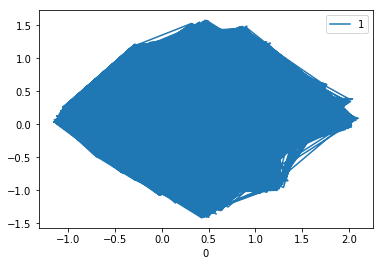

In [67]:
df_plot = pd.DataFrame(arr)
df_plot.plot(0,1)

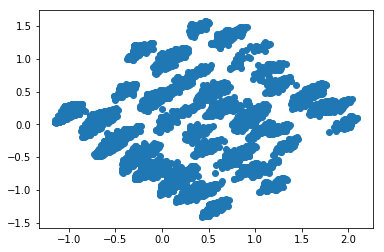

In [68]:
import matplotlib.pyplot as plt
plt.scatter(df_plot[df_plot.columns[0]],df_plot[df_plot.columns[1]])
plt.show()

from sklearn.model_selection import GridSearchCV
#parameters = {'max_depth':[2,3,4,5,6,7,8,9,10],}# 'min_samples_split':[2, 75]}
parameters = {'max_depth':list(range(2,15)), 'min_samples_split':list(range(5,100,5))}
Dtr = DecisionTreeRegressor()
clf = GridSearchCV(Dtr, parameters, cv=5,scoring='r2')
clf.fit(X, y)

##### clf.get_params()

clf.cv_results_['mean_test_score']

clf.best_estimator_

In [69]:
#clf = RandomForestRegressor(n_estimators=100,max_depth=8,min_samples_split=20)
#clf = RandomForestRegressor(n_estimators=100,max_depth=8,min_samples_split=75)
clf = RandomForestRegressor(n_estimators=50,max_depth=9,min_samples_split=75)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7580104958412898

In [70]:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)
scores = cross_val_score(clf, X, y, cv=cv) 
scores

array([0.79592606, 0.78036858, 0.79329944, 0.77021709, 0.79062842,
       0.78431572, 0.78965192, 0.77654542, 0.78858785, 0.78569647])

In [71]:
#prepare test data
def testDataPreprocessing(df):
    df = df.drop(['zipcode','county','address','city','state'],axis=1)
    df['x'] = df.latitude.apply(lambda x: math.cos(x)) * \
                                                        df.longitude.apply(lambda x : math.cos(x))
    df['y'] = df.latitude.apply(lambda x: math.cos(x)) * \
                                                        df.longitude.apply(lambda x : math.sin(x))
    df['z'] = df.latitude.apply(lambda x: math.sin(x))
    df = df.drop(['longitude','latitude'],axis=1)
    
    df.garage = df.garage.apply(lambda x: 'garage_yes' if x == 0 else 'garage_no' )
    df.pool = df.pool.apply(lambda x: 'pool_yes' if x == 0 else 'pool_no' )
    df.fireplace = df.fireplace.apply(lambda x: 'fireplace_yes' if x == 0 else 'fireplace_no' )
    df.patio = df.patio.apply(lambda x: 'patio_yes' if x == 0 else 'patio_no' )
    categorical_columns = ['time', 'property_type', 'garage', 'pool', 'fireplace', 'patio']
    for c in categorical_columns:
        temp = pd.get_dummies(df[c])
        df[temp.columns] = temp
    df = df.drop(categorical_columns, axis=1)
    
    return returnXy(df)

print(clf)
test_X, test_y = testDataPreprocessing(test_data)
print(test_X.info())
clf.score(test_X, test_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=75,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12132 entries, 0 to 12131
Data columns (total 46 columns):
cemetery_dist_miles      12132 non-null float64
nationalhighway_miles    12132 non-null float64
railline_miles           12132 non-null float64
starbucks_miles          12132 non-null float64
walmart_miles            12132 non-null float64
hospital_miles           12132 non-null float64
physician_dist_miles     12132 non-null float64
dentist_dist_miles       12132 non-null float64
opt_dist_miles           12132 non-null float64
vet_dist_miles           12132 non-null float64
farmers_miles            12132

0.5969535925548095

In [72]:
test_result = clf.predict(test_X)
test_result

array([1094.1155875 , 1864.94170841,  945.8794124 , ..., 1789.90617125,
       2175.41948298, 1770.68524238])

In [82]:
def printStats(test_result,test_y):
    per_count=[]
    for i in range(test_y.size):
        per_count.append(np.round(np.abs((test_result[i]- test_y[i])*100/test_y[i]),2))
    cnt = Counter(per_count)
    less_1 = less_2 = less_3 = less_4 = less_5 = 0
    for c in cnt:
        if c < 1:
            less_1 += cnt[c]
        if c < 2:
            less_2 += cnt[c]
        if c < 3:
            less_3 += cnt[c]
        if c < 4:
            less_4 += cnt[c]
        if c < 5 :
            less_5 += cnt[c]

    print(np.round((less_1*100/test_y.size),2),"% of properties within predicted rent within 1% of actual rent")
    print(np.round((less_2*100/test_y.size),2),"% of properties within predicted rent within 2% of actual rent")
    print(np.round((less_3*100/test_y.size),2),"% of properties within predicted rent within 3% of actual rent")
    print(np.round((less_4*100/test_y.size),2),"% of properties within predicted rent within 4% of actual rent")
    print(np.round((less_5*100/test_y.size),2),"% of properties within predicted rent within 5% of actual rent")
printStats(test_result,test_y)

2.65 % of properties within predicted rent within 1% of actual rent
4.9 % of properties within predicted rent within 2% of actual rent
7.43 % of properties within predicted rent within 3% of actual rent
10.06 % of properties within predicted rent within 4% of actual rent
12.68 % of properties within predicted rent within 5% of actual rent


In [94]:
'''sklearn.linear_model.SGDRegressor
sklearn.linear_model.Lasso 
sklearn.linear_model.ElasticNet
sklearn.linear_model.Ridge
sklearn.svm.SVR
sklearn.ensemble.AdaBoostRegressor
sklearn.ensemble.GradientBoostingRegressor
'''
from sklearn.linear_model import SGDRegressor, LassoCV, ElasticNetCV, RidgeCV
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

clf_s = [SGDRegressor(), LassoCV(), ElasticNetCV(), RidgeCV(), AdaBoostRegressor(),GradientBoostingRegressor()]#, SVR(kernel='linear')]
for c in clf_s:
    c.fit(X_train, y_train)
    print(c,c.score(X_test, y_test))

C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.6510349100666877
LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.753260177153199
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.394775736443896
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=F

In [95]:
clf_s[-1].score(test_X,test_y)

0.6986134721219396

In [96]:
printStats(clf_s[-1].predict(test_X),test_y)

2.99 % of properties within predicted rent within 1% of actual rent
5.93 % of properties within predicted rent within 2% of actual rent
8.7 % of properties within predicted rent within 3% of actual rent
11.61 % of properties within predicted rent within 4% of actual rent
14.21 % of properties within predicted rent within 5% of actual rent


In [97]:
clf_g = GradientBoostingRegressor(max_depth=9, min_samples_split=75)
clf_g.fit(X_train,y_train)
printStats(clf_g.predict(test_X),test_y)


2.86 % of properties within predicted rent within 1% of actual rent
5.75 % of properties within predicted rent within 2% of actual rent
8.63 % of properties within predicted rent within 3% of actual rent
11.56 % of properties within predicted rent within 4% of actual rent
14.18 % of properties within predicted rent within 5% of actual rent


In [98]:
clf_g = GradientBoostingRegressor(max_depth=8, min_samples_split=75)
clf_g.fit(X_train,y_train)
printStats(clf_g.predict(test_X),test_y)


2.73 % of properties within predicted rent within 1% of actual rent
5.82 % of properties within predicted rent within 2% of actual rent
8.62 % of properties within predicted rent within 3% of actual rent
11.75 % of properties within predicted rent within 4% of actual rent
14.57 % of properties within predicted rent within 5% of actual rent


In [99]:
clf_g = GradientBoostingRegressor(max_depth=8, min_samples_split=50)
clf_g.fit(X_train,y_train)
printStats(clf_g.predict(test_X),test_y)


3.07 % of properties within predicted rent within 1% of actual rent
6.16 % of properties within predicted rent within 2% of actual rent
9.06 % of properties within predicted rent within 3% of actual rent
12.01 % of properties within predicted rent within 4% of actual rent
15.17 % of properties within predicted rent within 5% of actual rent


In [100]:
clf_g = GradientBoostingRegressor(max_depth=9, min_samples_split=50)
clf_g.fit(X_train,y_train)
printStats(clf_g.predict(test_X),test_y)


2.7 % of properties within predicted rent within 1% of actual rent
5.53 % of properties within predicted rent within 2% of actual rent
8.29 % of properties within predicted rent within 3% of actual rent
11.03 % of properties within predicted rent within 4% of actual rent
14.04 % of properties within predicted rent within 5% of actual rent


In [115]:
clf_g = GradientBoostingRegressor(n_estimators=500,max_depth=8, min_samples_split=50)
clf_g.fit(X_train,y_train)
printStats(clf_g.predict(test_X),test_y)

3.13 % of properties within predicted rent within 1% of actual rent
5.73 % of properties within predicted rent within 2% of actual rent
8.53 % of properties within predicted rent within 3% of actual rent
11.88 % of properties within predicted rent within 4% of actual rent
14.88 % of properties within predicted rent within 5% of actual rent


In [104]:
clf_g = GradientBoostingRegressor(n_estimators=1500,max_depth=8, min_samples_split=50)
clf_g.fit(X_train,y_train)
printStats(clf_g.predict(test_X),test_y)

2.91 % of properties within predicted rent within 1% of actual rent
5.86 % of properties within predicted rent within 2% of actual rent
8.91 % of properties within predicted rent within 3% of actual rent
11.75 % of properties within predicted rent within 4% of actual rent
14.75 % of properties within predicted rent within 5% of actual rent


#### is best number of estimator between 500- 1500?

In [106]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':list(range(200,1500,100)),}# 'min_samples_split':[2, 75]} parameters = {'max_depth':list(range(2,15)), 'min_samples_split':list(range(5,100,5))} 
clf_g = GradientBoostingRegressor(max_depth=8, min_samples_split=50)
clf_grid_g = GridSearchCV(clf_g, parameters, cv=5,scoring='r2') 


In [107]:
clf_grid_g.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=50, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [109]:
clf_final = clf_grid_g.best_estimator_

In [112]:
clf_grid_g.cv_results_['mean_test_score']

array([0.75264786, 0.74527008, 0.74355679, 0.74373891, 0.74369026,
       0.74603116, 0.74123638, 0.73893404, 0.73917201, 0.74219854,
       0.74238963, 0.73785875, 0.73066724])

In [113]:
clf_final.score(test_X,test_y)

0.6608386556470114

In [114]:
printStats(clf_final.predict(test_X),test_y)

2.92 % of properties within predicted rent within 1% of actual rent
5.82 % of properties within predicted rent within 2% of actual rent
8.78 % of properties within predicted rent within 3% of actual rent
11.56 % of properties within predicted rent within 4% of actual rent
14.37 % of properties within predicted rent within 5% of actual rent


##### Unfortunately, not conclusive, let us try XGBoost

In [118]:
from xgboost import XGBRegressor

my_model = XGBRegressor(max_depth=8, n_estimators=500)
my_model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [119]:
printStats(my_model.predict(test_X),test_y)

3.28 % of properties within predicted rent within 1% of actual rent
6.18 % of properties within predicted rent within 2% of actual rent
9.35 % of properties within predicted rent within 3% of actual rent
12.08 % of properties within predicted rent within 4% of actual rent
14.88 % of properties within predicted rent within 5% of actual rent


3.13 % of properties within predicted rent within 1% of actual rent
5.73 % of properties within predicted rent within 2% of actual rent
8.53 % of properties within predicted rent within 3% of actual rent
11.88 % of properties within predicted rent within 4% of actual rent
14.88 % of properties within predicted rent within 5% of actual rent

In [120]:
my_model_1 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model_1.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [121]:
printStats(my_model_1.predict(test_X),test_y)

3.16 % of properties within predicted rent within 1% of actual rent
6.04 % of properties within predicted rent within 2% of actual rent
8.99 % of properties within predicted rent within 3% of actual rent
11.89 % of properties within predicted rent within 4% of actual rent
14.75 % of properties within predicted rent within 5% of actual rent


In [124]:
my_model_2 = XGBRegressor(max_depth=4, n_estimators=1000, learning_rate=0.05)
my_model_2.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
printStats(my_model_2.predict(test_X),test_y)

2.6 % of properties within predicted rent within 1% of actual rent
5.44 % of properties within predicted rent within 2% of actual rent
8.15 % of properties within predicted rent within 3% of actual rent
11.1 % of properties within predicted rent within 4% of actual rent
13.78 % of properties within predicted rent within 5% of actual rent


In [126]:
my_model_2 = XGBRegressor(max_depth=7, n_estimators=1000, learning_rate=0.05)
my_model_2.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
printStats(my_model_2.predict(test_X),test_y)

2.76 % of properties within predicted rent within 1% of actual rent
5.62 % of properties within predicted rent within 2% of actual rent
8.72 % of properties within predicted rent within 3% of actual rent
11.68 % of properties within predicted rent within 4% of actual rent
14.61 % of properties within predicted rent within 5% of actual rent


In [128]:
my_model_3 = XGBRegressor(max_depth=8, n_estimators=1000, learning_rate=0.05)
my_model_3.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
printStats(my_model_3.predict(test_X),test_y)

3.13 % of properties within predicted rent within 1% of actual rent
5.95 % of properties within predicted rent within 2% of actual rent
8.53 % of properties within predicted rent within 3% of actual rent
11.41 % of properties within predicted rent within 4% of actual rent
13.93 % of properties within predicted rent within 5% of actual rent


In [129]:
my_model_4 = XGBRegressor(max_depth=9, n_estimators=1000, learning_rate=0.05)
my_model_4.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
printStats(my_model_4.predict(test_X),test_y)

3.03 % of properties within predicted rent within 1% of actual rent
5.88 % of properties within predicted rent within 2% of actual rent
8.78 % of properties within predicted rent within 3% of actual rent
11.61 % of properties within predicted rent within 4% of actual rent
14.28 % of properties within predicted rent within 5% of actual rent


In [130]:
my_model_5 = XGBRegressor(max_depth=10, n_estimators=1000, learning_rate=0.05)
my_model_5.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
printStats(my_model_5.predict(test_X),test_y)

2.77 % of properties within predicted rent within 1% of actual rent
5.65 % of properties within predicted rent within 2% of actual rent
8.57 % of properties within predicted rent within 3% of actual rent
11.45 % of properties within predicted rent within 4% of actual rent
14.51 % of properties within predicted rent within 5% of actual rent


In [292]:
my_model_5 = XGBRegressor(max_depth=8, n_estimators=500, learning_rate=0.1)
#, eval_set=[(X_test, y_test)]
my_model_5.fit(X, y, verbose=True)
printStats(my_model_5.predict(test_X),test_y)

3.28 % of properties within predicted rent within 1% of actual rent
6.18 % of properties within predicted rent within 2% of actual rent
9.35 % of properties within predicted rent within 3% of actual rent
12.08 % of properties within predicted rent within 4% of actual rent
14.88 % of properties within predicted rent within 5% of actual rent


In [136]:
my_model_5 = XGBRegressor(max_depth=9, n_estimators=500, learning_rate=0.1)
#, eval_set=[(X_test, y_test)]
my_model_5.fit(X, y, verbose=True)
printStats(my_model_5.predict(test_X),test_y)

2.77 % of properties within predicted rent within 1% of actual rent
5.57 % of properties within predicted rent within 2% of actual rent
8.61 % of properties within predicted rent within 3% of actual rent
11.51 % of properties within predicted rent within 4% of actual rent
14.62 % of properties within predicted rent within 5% of actual rent


In [137]:
my_model_5

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=9, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

##### Let us see if the property type prediction helps in the prediction.

In [144]:
final_predict_property_type = predict_property_type[predict_property_type.property_type.isna()]
train_predict_property_type = predict_property_type.dropna()
train_predict_property_type
print("Train Samples : ", train_predict_property_type.shape, " Test Samples : ",test_predict_property_type.shape )
print(train_predict_property_type.head(2))

Train Samples :  (15515, 11)  Test Samples :  (2688, 11)
   bed  bath  halfbath  sqft  yearbuilt      lotsize  garage  pool  fireplace  \
0    3     2         1  2000       2008  4086.388045       1     0          1   
1    2     1         1  1100       1935  2247.513425       0     0          0   

   patio property_type  
0      0         Condo  
1      0         Condo  


In [276]:
def returnXYforProperType(df):
    y = df['property_type']
    
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le.fit(y)
    
    y= le.transform(y)
    
    X = df.copy()
    X = X.drop('property_type', axis=1)
    np_scaled = min_max_scaler.fit_transform(X)
    df_normalized = pd.DataFrame(np_scaled,columns=X.columns)
    return df_normalized,y

X_prop_train, y_prop_train = returnXYforProperType(train_predict_property_type)
#X_prop_predict, y_prop_predict = returnXYforProperType(final_predict_property_type)

'''clf_prop = DecisionTreeRegressor(max_depth=10, min_samples_split=50)
clf_prop.fit(X_prop_train[:-200],y_prop_train[:-200])
print(clf_prop.score(X_prop_train[-200:], y_prop_train[-200:])) #0.378002969525984'''

'''clf_rfr = RandomForestRegressor(n_estimators=500, max_depth=10, min_samples_split=50)
clf_rfr.fit(X_prop_train[:-200],y_prop_train[:-200])
clf_rfr.score(X_prop_train[-200:], y_prop_train[-200:])#0.3730836253361981'''

clf_xgbr = XGBRegressor(n_estimators=200, max_depth=10, min_samples_split=50)
clf_xgbr.fit(X_prop_train[:-200],y_prop_train[:-200])
clf_xgbr.score(X_prop_train[-200:], y_prop_train[-200:])#0.3730836253361981'''

0.3914429369999257

##### It is not worth to impute based on prediction as the confidence of the prediction is not even 50%. We do not want to introduce outliers into our dataset. There is a reduction of 14.77% in dataset size due to ignoring samples with NaN values for 'property_type'.

In [289]:
print("Reduction in the Dataset size due to rejecting samples of NaN values : ",np.round((train_data[train_data.property_type.isna()]).shape[0] * 100 / train_data.shape[0],2),"%")

Reduction in the Dataset size due to rejecting samples of NaN values :  14.77 %


In [295]:
print(test_data[test_data.property_type.isna()].shape)
print(test_data.shape)
na_test_data = test_data[test_data.property_type.isna()]
na_train_X, na_train_y = testDataPreprocessing(na_test_data)
printStats(my_model_5.predict(na_train_X),na_train_y)

(1825, 40)
(12132, 40)


ValueError: feature_names mismatch: ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft', 'yearbuilt', 'lotsize', 'Census_MedianIncome', 'CollegeGrads', 'WhiteCollar', 'Schools', 'Unemployment', 'EmploymentDiversity', 'Census_Vacancy', 'Crime_Rate', 'HomePrice', 'x', 'y', 'z', '2015.25', '2015.5', '2015.75', '2016.25', 'Condo', 'Duplex', 'Quadplex', 'SFR', 'Triplex', 'garage_no', 'garage_yes', 'pool_no', 'pool_yes', 'fireplace_no', 'fireplace_yes', 'patio_no', 'patio_yes'] ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft', 'yearbuilt', 'lotsize', 'Census_MedianIncome', 'CollegeGrads', 'WhiteCollar', 'Schools', 'Unemployment', 'EmploymentDiversity', 'Census_Vacancy', 'Crime_Rate', 'HomePrice', 'x', 'y', 'z', '2015.25', '2015.5', 'garage_no', 'garage_yes', 'pool_no', 'pool_yes', 'fireplace_no', 'fireplace_yes', 'patio_no', 'patio_yes']
expected Quadplex, SFR, Duplex, 2015.75, Triplex, 2016.25, Condo in input data

##### This is the serious problem !!!! we need to use mapper for this.

In [307]:
print(test_data[test_data.property_type.isna()].shape)
print(test_data.shape)
na_test_data = test_data[test_data.property_type.isna()]
na_train_X, na_train_y = testDataPreprocessing(test_data)
print(na_train_X[test_data.property_type.isna()].shape, na_train_X.shape)
print(na_train_y[test_data.property_type.isna()].shape)
printStats(my_model_5.predict(na_train_X[test_data.property_type.isna()]),np.array(na_train_y[test_data.property_type.isna()]))

(1825, 40)
(12132, 40)
(1825, 46) (12132, 46)
(1825,)
3.07 % of properties within predicted rent within 1% of actual rent
5.32 % of properties within predicted rent within 2% of actual rent
7.84 % of properties within predicted rent within 3% of actual rent
10.96 % of properties within predicted rent within 4% of actual rent
13.26 % of properties within predicted rent within 5% of actual rent


##### What does this mean is that sub sample of test data has lower scores. It may be lowering the overall output. Let us check if na values are removed from the test data; would it give a better output.

In [319]:
print("Total number of entries is the test data set : ", test_data.shape[0])
print("Number of Nan entries in the test data set : ", test_data[test_data.property_type.isna()].shape[0])
print ("Difference : ",  test_data.shape[0] - test_data[test_data.property_type.isna()].shape[0] ,"\n")

na_test_data = test_data[test_data.property_type.isna()]
na_train_X, na_train_y = testDataPreprocessing(test_data)

na_train_X = na_train_X.drop(na_train_X[test_data.property_type.isna()].index)
print("Post ignoring the Nan entries, test data size of X: ", na_train_X.shape[0])

na_train_y = na_train_y.drop(na_train_y[test_data.property_type.isna()].index)
print("Post ignoring the Nan entries, test data size of y: ", na_train_y.shape[0], "\n")

printStats(my_model_5.predict(na_train_X),np.array(na_train_y))

Total number of entries is the test data set :  12132
Number of Nan entries in the test data set :  1825
Difference :  10307 

Post ignoring the Nan entries, test data size of X:  10307
Post ignoring the Nan entries, test data size of y:  10307 

3.32 % of properties within predicted rent within 1% of actual rent
6.34 % of properties within predicted rent within 2% of actual rent
9.61 % of properties within predicted rent within 3% of actual rent
12.27 % of properties within predicted rent within 4% of actual rent
15.16 % of properties within predicted rent within 5% of actual rent


The best ever result so far was :
* 3.28 % of properties within predicted rent within 1% of actual rent
* 6.18 % of properties within predicted rent within 2% of actual rent
* 9.35 % of properties within predicted rent within 3% of actual rent
* 12.08 % of properties within predicted rent within 4% of actual rent
* 14.88 % of properties within predicted rent within 5% of actual rent

##### However, this does not give any computational confidence of how important the missing values are !!!!! It is only post a valid impute operation we would know for sure how good the prediction would be.
##### Perhaps, in Exploratory Data Analysis we may try to visually represent the impact.